<a href="https://colab.research.google.com/github/Ronydavison007/ml_mini_projects/blob/main/Animal%20Classification/Animal_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.layers import GlobalAveragePooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from matplotlib import pyplot as plt

In [3]:
#Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Define necessary paths
dataset = '/content/drive/My Drive/Colab Notebooks/Animal Classification/dataset'
image_dir = '/content/drive/My Drive/Colab Notebooks/Animal Classification/data/images'
label_dir = '/content/drive/My Drive/Colab Notebooks/Animal Classification/data/labels'

In [5]:
#Defining classes
classes = {}
if os.path.exists(dataset):
  for id, class_name in enumerate(os.listdir(dataset)):
    classes[class_name] = id
  print(classes)
else:
  print('Dataset not found')

{'Zebra': 0, 'Lion': 1, 'Elephant': 2, 'Giraffe': 3, 'Dolphin': 4, 'Tiger': 5, 'Horse': 6, 'Kangaroo': 7, 'Panda': 8, 'Dog': 9, 'Deer': 10, 'Cat': 11, 'Bear': 12, 'Cow': 13, 'Bird': 14}


In [6]:
#Create an image directory and move the images
if not os.path.exists(image_dir):
  os.makedirs(image_dir)
  for class_name in classes.values():
    class_path = os.path.join(dataset, class_name)
    for image_name in os.listdir(class_path):
      image_path = os.path.join(class_path, image_name)
      os.rename(image_path, os.path.join(image_dir, image_name))
      print('Image moved')
else:
  print('Image directory already exists')

Image directory already exists


In [7]:
#Create a label list for the images
labels = []
for image_name in os.listdir(image_dir):
  label_name = image_name.split('.')[0] + '.txt'
  animal_name = label_name.split('_')[0]
  labels.append(classes[animal_name])
print(labels)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 3, 3, 3, 3, 3, 3, 3, 6, 3, 3, 3, 6, 3, 3, 3, 6, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 6, 7, 7, 7, 7, 6, 7, 7, 6, 7, 6, 6, 6, 6, 6, 7, 7, 6, 7, 7, 

In [8]:
#Convert the images to arrays
image_paths = []
for image_name in os.listdir(image_dir):
  image_path = os.path.join(image_dir, image_name)
  image_paths.append(image_path)

images = np.array([img_to_array(load_img(image_path)) for image_path in image_paths])
labels = np.array(labels)

In [9]:
print(images.shape)
print(labels.shape)

(1944, 224, 224, 3)
(1944,)


In [10]:
#Split into train and test
train_img, test_img, train_label, test_label = train_test_split(images, labels, test_size=0.2, random_state=42)
print(train_img.shape)
print(test_img.shape)
print(train_label.shape)
print(test_label.shape)

(1555, 224, 224, 3)
(389, 224, 224, 3)
(1555,)
(389,)


In [14]:
train_img = train_img / 255.0
test_img = test_img / 255.0
train_label = train_label.flatten()
test_label = test_label.flatten()

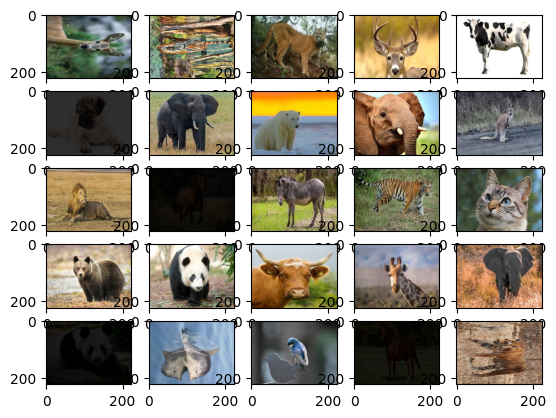

[10  5  1 10 13  9  2 12  2  7]


In [17]:
fig, ax = plt.subplots(5,5)
k = 0

for i in range(5):
    for j in range(5):
        ax[i][j].imshow(train_img[k], aspect='auto')
        k += 1
plt.show()
print(train_label[0:10])

In [27]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(15, activation='softmax')
])


In [28]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
run = model.fit(
  train_img, train_label, validation_data=(test_img, test_label), epochs=25, batch_size=32, callbacks=[early_stopping, lr_scheduler])

Epoch 1/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.0845 - loss: 3.1231 - val_accuracy: 0.3085 - val_loss: 2.3096 - learning_rate: 1.0000e-04
Epoch 2/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.2534 - loss: 2.3141 - val_accuracy: 0.6015 - val_loss: 1.8604 - learning_rate: 1.0000e-04
Epoch 3/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.4318 - loss: 1.9475 - val_accuracy: 0.7069 - val_loss: 1.4585 - learning_rate: 1.0000e-04
Epoch 4/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.5806 - loss: 1.5232 - val_accuracy: 0.7763 - val_loss: 1.1454 - learning_rate: 1.0000e-04
Epoch 5/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.6655 - loss: 1.2802 - val_accuracy: 0.8303 - val_loss: 0.9302 - learning_rate: 1.0000e-04
Epoch 6/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.7077 - loss: 1.1073 - val_accuracy: 0.8458 - val_loss: 0.7923 - learning_rate: 1.0000e-04
Epoch 7/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7403 - loss:

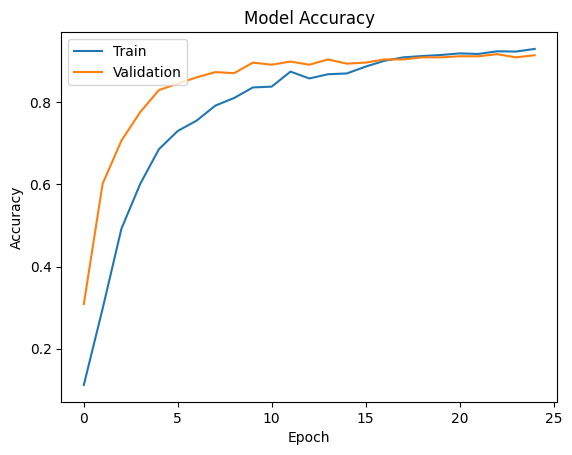

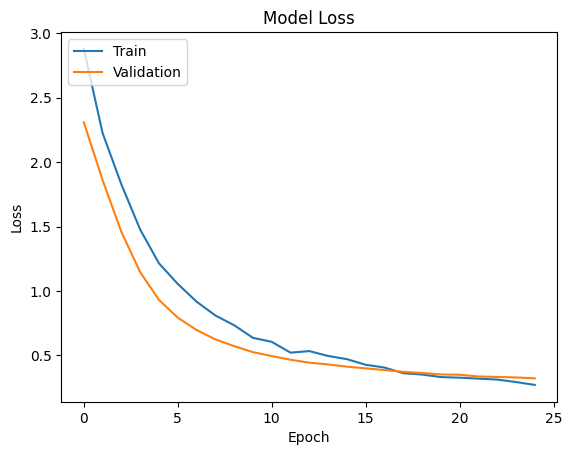

In [30]:
# Plot training & validation accuracy
plt.plot(run.history['accuracy'])
plt.plot(run.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(run.history['loss'])
plt.plot(run.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted label is Bear


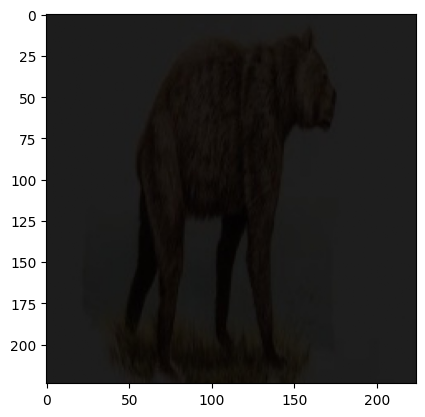

In [45]:
#classification
img_number = 3
plt.imshow(test_img[img_number])

img_arr = np.array(test_img[img_number]).reshape(1, 224, 224, 3)

predicted_label = model.predict(img_arr).argmax()
key_label = [k for k, v in classes.items() if v == predicted_label]
predicted_label = key_label[0]

print("Predicted label is {}".format(predicted_label))